In [32]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import requests
import requests.auth as auth
import json

In [33]:
# Read in name of each subway, and its lat long information
subway_to_latlong = pd.read_csv("geocoded.csv")

# Read in census, median income data
census_to_median_income = pd.read_csv('census_data/census_data.csv')

# Read in 2020 Turnstile data
turnstile = pd.read_csv("Turnstile_2020.csv")
turnstile.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,6,7,10,11,14,15,18,19,22,23,26,27,30,31,32,38,39,40,42,43,46,47,50,51,54,55,56,58,59,62,63,64,66,67,70,71,72,74,75,78,79,82,83,86,87,90,91,94,95,102,103,104,106,107,110,111,114,115,118,119,122,123,126,127,128,130,131,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,174,175,178,179,182,183,184,186,187,190,191,194,195,198,199,202,203,204,206,207,210,211,214,215,218,219,222,223,226,227,230,231,234,235,238,239,242,243,254,255,262,263,270,271,278,279,286,287,294,295,298,299,300,302,303,306,307,310,311,314,315,318,319,322,323,326,327,330,331,334,335,338,339,354,355,356,378,379,380,382,383,386,387,390,391,394,395,398,399,400,402,403,406,407,408,410,411,412,414,415,416,418,419,422,423,426,427,430,431,434,435,436,438,439,442,443,446,447,450,451,454,455,456,458,459,462,463,466,467,470,471) have mixed types.Specify dtype option on import or set low_memory=False

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,00:00:00,REGULAR,7412670,2516433
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,00:00:00,REGULAR,7412670,2516433
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,04:00:00,REGULAR,7412671,2516433
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,04:00:00,REGULAR,7412671,2516433
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,08:00:00,REGULAR,7412680,2516454


In [34]:
# drop the duplicate rows
subway_to_latlong = subway_to_latlong.drop_duplicates(subset="Station")

In [35]:
# drop unneccessary rows, and indicate that "station" is the index. join with the turnstile
# data so lat long and turnstile data is together
cleaned = subway_to_latlong.drop("Division", axis = 1)
cleaned = turnstile.join(cleaned.set_index("Station"), on='Station')
cleaned.head(50)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Code,Stationcode,Lines,Lat,Long
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,00:00:00,REGULAR,7412670,2516433,R212,C021,NR,40.641426,-74.017972
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,00:00:00,REGULAR,7412670,2516433,R212,C021,NR,40.641426,-74.017972
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,04:00:00,REGULAR,7412671,2516433,R212,C021,NR,40.641426,-74.017972
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,04:00:00,REGULAR,7412671,2516433,R212,C021,NR,40.641426,-74.017972
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,08:00:00,REGULAR,7412680,2516454,R212,C021,NR,40.641426,-74.017972
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,08:00:00,REGULAR,7412680,2516454,R212,C021,NR,40.641426,-74.017972
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,12:00:00,REGULAR,7412699,2516478,R212,C021,NR,40.641426,-74.017972
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,12:00:00,REGULAR,7412699,2516478,R212,C021,NR,40.641426,-74.017972
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,16:00:00,REGULAR,7412748,2516488,R212,C021,NR,40.641426,-74.017972
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2020,16:00:00,REGULAR,7412748,2516488,R212,C021,NR,40.641426,-74.017972


In [36]:
# Select a week day from before lockdown, and a day after lock down to compare against
cropped = cleaned[cleaned.Date.isin(["03/26/2020", "02/15/2020"])]

In [37]:
# group by the station, unit, SCP and date and then comput the max and min for that date by
# turnstile by station so that we know what the starting and ending "entry" count was for the day
grouped = cropped.groupby(["Station", "Unit", "SCP", "Date"]).agg({"Entries":[np.max, np.min]})
# add a row to subtract the difference so that we know the number of entries at each station, turnstil
# on each date
grouped["num_entries"]=grouped.apply(lambda row: row.Entries.amax-row.Entries.amin, axis=1)
#reset the index to bring it back to a pandas dataframe object and not a grouped object
reset_grouped = grouped.reset_index()

In [38]:
reset_grouped.head()

Station  Unit       SCP        Date    Entries            num_entries
                                            amax       amin            
0    1 AV  R248  00-00-00  02/15/2020   15455021   15455000          21
1    1 AV  R248  00-00-01  02/15/2020   61128750   61128727          23
2    1 AV  R248  00-03-00  02/15/2020  370864078  370864076           2
3    1 AV  R248  00-03-01  02/15/2020    2605073    2605071           2
4    1 AV  R248  00-03-02  02/15/2020    6632476    6632469           7

In [39]:
# group again by station and date and sum all the number of entries during the grouping
# so we wind up with two rows for each station, one for each date, in preparation
# to calculate the percent difference
num_entries = reset_grouped.groupby(['Station','Date'])["num_entries"].sum().reset_index()
num_entries.head(5)

,Station,Date,num_entries
0,1 AV,02/15/2020,4812
1,1 AV,03/26/2020,1896
2,103 ST,02/15/2020,14347
3,103 ST,03/26/2020,4624
4,103 ST-CORONA,02/15/2020,12904


In [40]:
# a method to help calc the percent diff at each station before and after corona
def pct_diff(a):
    return (a.iloc[1]-a.iloc[0])/a.iloc[0]

# use the above method to calcuate the percent diff in the grouping in pandas
percentage = num_entries.groupby("Station").agg({"num_entries":pct_diff})
percentage.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,num_entries
Station,
1 AV,-0.605985
103 ST,-0.677703
103 ST-CORONA,-0.704355
104 ST,-0.588883
110 ST,-0.666184


In [41]:
# join the lost lat long back with this percentage difference pandas dataframe
lat_long = percentage.join(subway_to_latlong.set_index("Station"), on='Station')
# drop the unnecessary columns
lat_long = lat_long.drop("Code", axis=1)
lat_long = lat_long.drop("Division", axis=1)
lat_long = lat_long.drop("Lines", axis=1)
lat_long = lat_long.drop("Stationcode", axis=1)
lat_long = lat_long.dropna(axis=0)
lat_long.head()

,num_entries,Lat,Long
Station,,,
1 AV,-0.605985,40.730901,-73.981719
103 ST,-0.677703,40.799354,-73.968329
103 ST-CORONA,-0.704355,40.749858,-73.862672
104 ST,-0.588883,40.695184,-73.844326
110 ST,-0.666184,40.795066,-73.944297


In [42]:
# A function that takes in a lat long, and using the fcc api, turns that into the census tract the station belongs to
def lat_long_to_census_tract(lat, long):
    format_str = "https://geo.fcc.gov/api/census/area?lat={}&lon={}&format=json".format(lat, long)
    response = requests.get(format_str)
    # If the lat long belongs to two census tracts, take the first one
    # and return the census tract id that is formatted the way 
    # the American Community Survey expects, which is the first 11 digits of the block id. 
    return response.json()['results'][0]['block_fips'][0:11]

# A function that takes in the census tract id, turns it into the GEO_ID that the ACS dataset requires, and gives back the 
# median household income there
def census_tract_to_median_income_dollars(census_tract):
    # from the headers file, find the column name for median household income
    name_of_median_income_col = 'DP03_0062E'
    # convert to geo id
    geo_id = "1400000US"+census_tract
    
    # filter dataframe to those matching the geo id
    median_income_in_census_tract = census_to_median_income[census_to_median_income["GEO_ID"]==geo_id]
    
    # If there is missing data, throw out that value
    try:
        median_income_in_census_tract[name_of_median_income_col].values[0]== '-'
    except:
        return None
    
    # If its a string that denotes the median income is greater than 250,000, code that as 250,001 and make a note
    # in the piece that this is all that the ACS collects
    if median_income_in_census_tract[name_of_median_income_col].values[0]== '250,000+':
        return 250001
    
    # Convert to an int before returning, if it is not possible to convert, the data is missing
    # and that value should be thrown out
    try:
        return int(median_income_in_census_tract[name_of_median_income_col].values[0])
    except:
        return None

In [43]:
# use the above function to add a column in order to use the lat long data to understand which census
# tract every station is in
lat_long["census_tract"] = lat_long.apply(lambda row: lat_long_to_census_tract(row["Lat"], row["Long"]), axis=1)
lat_long.head()

,num_entries,Lat,Long,census_tract
Station,,,,
1 AV,-0.605985,40.730901,-73.981719,36061003400
103 ST,-0.677703,40.799354,-73.968329,36061019100
103 ST-CORONA,-0.704355,40.749858,-73.862672,36081040500
104 ST,-0.588883,40.695184,-73.844326,36081002600
110 ST,-0.666184,40.795066,-73.944297,36061017200


In [44]:
# use the census tract information to use the above function to create a new column
# to add what the median income in the census tract is from the census data
lat_long["income"] = lat_long.apply(lambda row: census_tract_to_median_income_dollars(row["census_tract"]), axis=1)
lat_long.head()

,num_entries,Lat,Long,census_tract,income
Station,,,,,
1 AV,-0.605985,40.730901,-73.981719,36061003400,79452.0
103 ST,-0.677703,40.799354,-73.968329,36061019100,96843.0
103 ST-CORONA,-0.704355,40.749858,-73.862672,36081040500,51677.0
104 ST,-0.588883,40.695184,-73.844326,36081002600,83571.0
110 ST,-0.666184,40.795066,-73.944297,36061017200,32537.0


In [45]:
# drop any Nans from the dataset as this will cause the graphing to crash
lat_long = lat_long.dropna(axis=0)
# because of a renegade turnstile that claimed that a third of the worlds population
# had passed through that turnstile, one stations values broke, so filter that value out
lat_long = lat_long[lat_long["num_entries"]<0]

In [46]:
# convert the num entries percentage points column to percent by multiplying by 100
lat_long["pct"] = lat_long.apply(lambda row: row["num_entries"]*100, axis=1)
lat_long.head()

,num_entries,Lat,Long,census_tract,income,pct
Station,,,,,,
1 AV,-0.605985,40.730901,-73.981719,36061003400,79452.0,-60.598504
103 ST,-0.677703,40.799354,-73.968329,36061019100,96843.0,-67.770266
103 ST-CORONA,-0.704355,40.749858,-73.862672,36081040500,51677.0,-70.435524
104 ST,-0.588883,40.695184,-73.844326,36081002600,83571.0,-58.888332
110 ST,-0.666184,40.795066,-73.944297,36061017200,32537.0,-66.618366


Text(0.5, 1.0, 'How much did Covid Affect Ridership by Station according to its Median Income?')

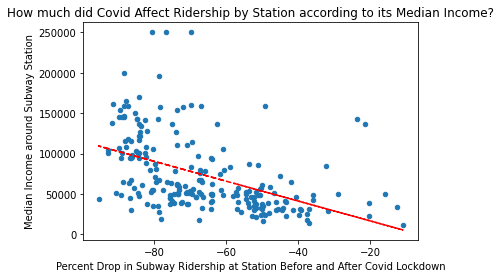

In [47]:
# create the scatter graph by graphing the median income vs. the percent drop in ridership around that 
# station
plot = lat_long.plot.scatter(y="income", x="pct")
x = lat_long["pct"]

# build a trend line to overlay
z = np.polyfit(x, lat_long["income"], 1)
p = np.poly1d(z)
plot.plot(x,p(x),"r--")
plot.set_xlabel("Percent Drop in Subway Ridership at Station Before and After Covid Lockdown")
plot.set_ylabel("Median Income around Subway Station")
plot.set_title("How much did Covid Affect Ridership by Station according to its Median Income?")